In [120]:
!pip install bayesian-optimization

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [122]:
df = pd.read_csv('/content/Obesity Dataset.csv')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  107 non-null    object 
 3   Height  107 non-null    float64
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 6.0+ KB


In [124]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,107.00000,108.000000,108.000000
mean,56.046296,47.481481,166.82243,59.490741,21.382407
std,31.917939,26.996878,27.88447,28.856233,10.712992
min,1.000000,11.000000,120.00000,10.000000,3.900000
25%,28.750000,27.000000,140.00000,35.000000,16.700000
50%,56.500000,42.500000,175.00000,55.000000,21.850000
75%,83.250000,59.250000,190.00000,85.000000,26.100000
max,110.000000,160.000000,210.00000,120.000000,100.000000


In [125]:
df.isnull().sum()

ID        0
Age       0
Gender    1
Height    1
Weight    0
BMI       0
Label     0
dtype: int64

In [126]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [127]:
df.shape

(108, 7)

In [128]:
df['Label'].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese',
       'underweight', 'Normal', 'Under weight', 'obese', 'Over weight',
       'Underwight'], dtype=object)

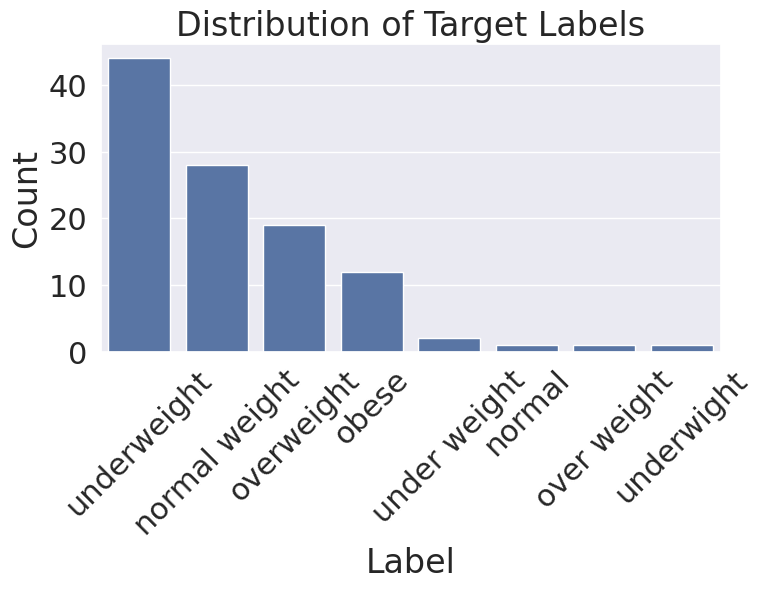

The label 'underweight' has the maximum count of 44.


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Label'] = df['Label'].str.lower().str.strip()

# Plotting the distribution of target labels
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Label', order=df['Label'].value_counts().index)
plt.title('Distribution of Target Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

# Finding the label with the maximum occurrences
max_label = df['Label'].value_counts().idxmax()
max_count = df['Label'].value_counts().max()
print(f"The label '{max_label}' has the maximum count of {max_count}.")

In [130]:
# Count of each category in the 'Label' column
label_counts = df['Label'].value_counts()

print("Count of each category:")
print(label_counts)


Count of each category:
underweight      44
normal weight    28
overweight       19
obese            12
under weight      2
normal            1
over weight       1
underwight        1
Name: Label, dtype: int64


##  Typograpical error exist
-

In [131]:
# Rename inconsistent label categories
df['Label'] = df['Label'].replace({
    'under weight': 'underweight',
    'normal': 'normal weight',
    'over weight': 'overweight',
    'underwight': 'underweight'
})


In [132]:
# Count of each category after renaming
label_counts = df['Label'].value_counts()

print("Count of each category after renaming:")
print(label_counts)


Count of each category after renaming:
underweight      47
normal weight    29
overweight       20
obese            12
Name: Label, dtype: int64


In [133]:
df['Label'] = df['Label'].str.replace('normal weight', 'normalweight')

In [134]:
label_counts = df['Label'].value_counts()

print("Count of each category after renaming:")
print(label_counts)

Count of each category after renaming:
underweight     47
normalweight    29
overweight      20
obese           12
Name: Label, dtype: int64


In [135]:
df.isnull().sum()

ID        0
Age       0
Gender    1
Height    1
Weight    0
BMI       0
Label     0
dtype: int64

## Play with Gender

In [136]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [137]:
gender_counts = df['Gender'].value_counts()

print("Count of each category after renaming:")
print(gender_counts)

Count of each category after renaming:
Male      55
Female    52
Name: Gender, dtype: int64


In [138]:
# Remove rows where 'Gender' is null
df.dropna(subset=['Gender'], inplace=True)


In [139]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<ipython-input-140-4100256ee2af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df,palette=custom_palette)


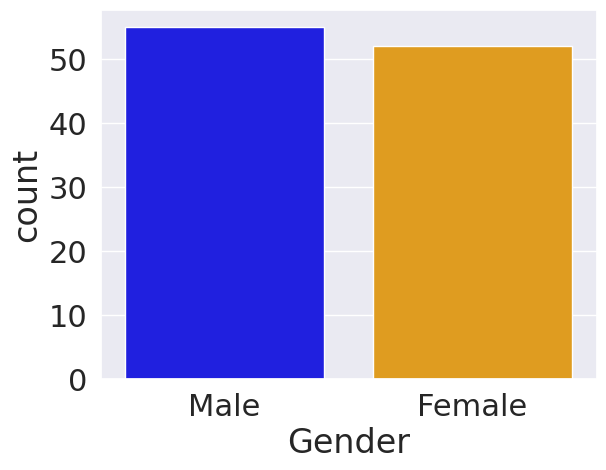

In [140]:
# male & female check
custom_palette = {'Male': 'blue', 'Female': 'orange'}

sns.countplot(x='Gender',data=df,palette=custom_palette)
plt.show()

In [141]:
df['Height'].nunique()

10

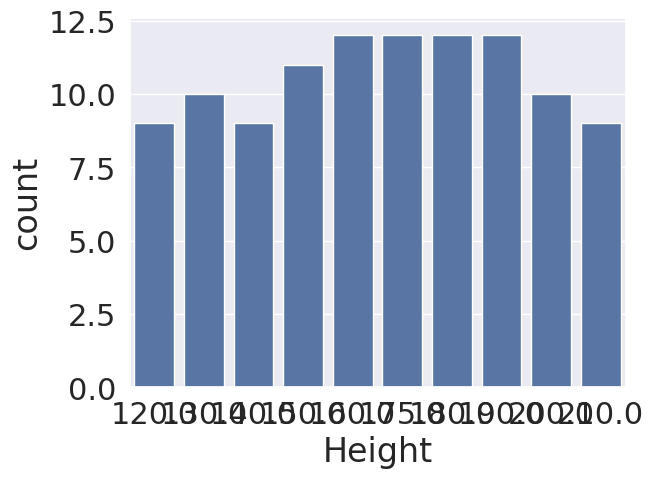

In [142]:
sns.countplot(x='Height',data=df)
plt.show()

In [143]:
# Calculate the mean height
df['Height'].mean()


166.41509433962264

In [144]:
mean_height = df['Height'].mean()

# Replace missing values with the mean height
df['Height'].fillna(mean_height, inplace=True)


In [145]:
df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [146]:
df.shape

(107, 7)

In [147]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [148]:
df.head(10)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175.0,80,25.3,normalweight
1,2,30,Female,160.0,60,22.5,normalweight
2,3,35,Male,180.0,90,27.3,overweight
3,4,40,Female,150.0,50,20.0,underweight
4,5,45,Male,190.0,100,31.2,obese
5,6,50,Female,140.0,40,16.7,underweight
6,7,55,Male,200.0,110,34.2,obese
7,8,60,Female,130.0,30,13.3,underweight
8,9,65,Male,210.0,120,37.2,obese
9,10,70,Female,120.0,20,10.0,underweight


In [149]:
df.tail(5)

,ID,Age,Gender,Height,Weight,BMI,Label
103,106,11,Male,175.0,10,3.9,underweight
104,107,16,Female,160.0,10,3.9,underweight
105,108,21,Male,180.0,15,5.6,underweight
106,109,26,Female,150.0,15,5.6,underweight
107,110,31,Male,190.0,20,8.3,underweight


In [150]:
df['Weight']

0       80
1       60
2       90
3       50
4      100
      ... 
103     10
104     10
105     15
106     15
107     20
Name: Weight, Length: 107, dtype: int64

In [151]:
# Assuming you have a DataFrame 'df' with the 'Weight' column
min_weight = df['Weight'].min()
max_weight = df['Weight'].max()

print(f"The minimum weight is {min_weight}.")
print(f"The maximum weight is {max_weight}.")


The minimum weight is 10.
The maximum weight is 120.


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      107 non-null    int64  
 1   Age     107 non-null    int64  
 2   Gender  107 non-null    object 
 3   Height  107 non-null    float64
 4   Weight  107 non-null    int64  
 5   BMI     107 non-null    float64
 6   Label   107 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 6.7+ KB


# Label Encoder

In [153]:
df['Label'].unique()

array(['normalweight', 'overweight', 'underweight', 'obese'], dtype=object)

In [154]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

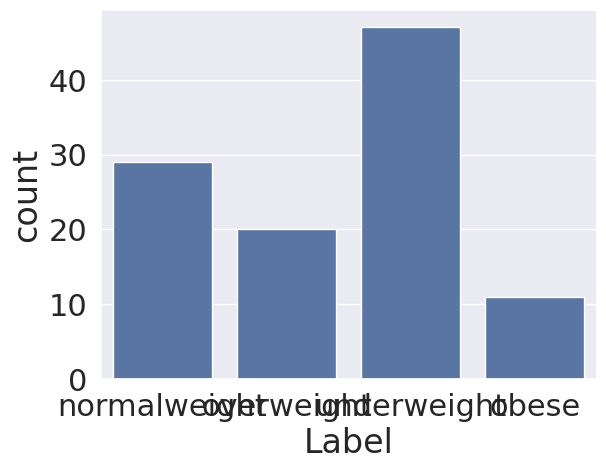

In [155]:
sns.countplot(x='Label',data=df)
plt.show()

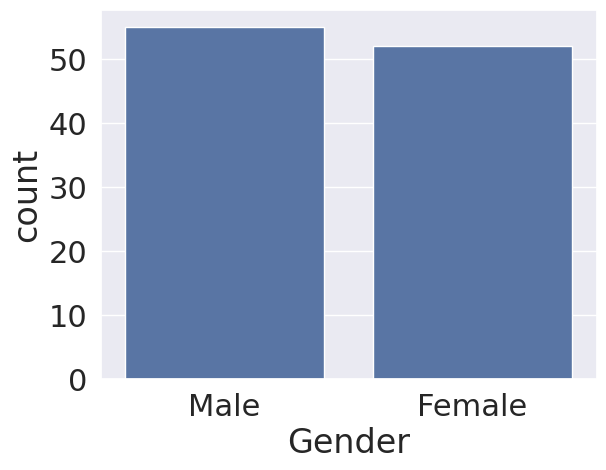

In [156]:
sns.countplot(x='Gender',data=df)
plt.show()

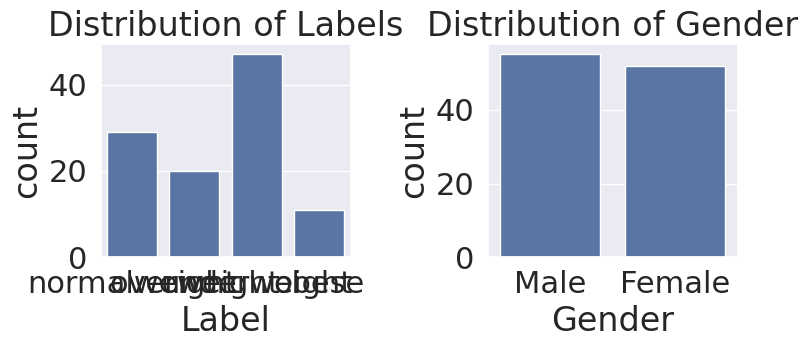

In [157]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot count plot for 'Label' in the first subplot
sns.countplot(x='Label', data=df, ax=axes[0])
axes[0].set_title('Distribution of Labels')

# Plot count plot for 'Gender' in the second subplot
sns.countplot(x='Gender', data=df, ax=axes[1])
axes[1].set_title('Distribution of Gender')

# Adjust layout
plt.tight_layout()

plt.show()


In [158]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode categorical variables
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Label'] = label_encoder.fit_transform(df['Label'])

# Display the updated DataFrame
print(df.head())


   ID  Age  Gender  Height  Weight   BMI  Label
0   1   25       1   175.0      80  25.3      0
1   2   30       0   160.0      60  22.5      0
2   3   35       1   180.0      90  27.3      2
3   4   40       0   150.0      50  20.0      3
4   5   45       1   190.0     100  31.2      1


In [159]:
df['Label'].unique()


array([0, 2, 3, 1])

<ipython-input-160-8985b2749a6a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, ax=axes[0],palette=custom_palette,legend=True)
<ipython-input-160-8985b2749a6a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, ax=axes[1],palette=custom_palette1)


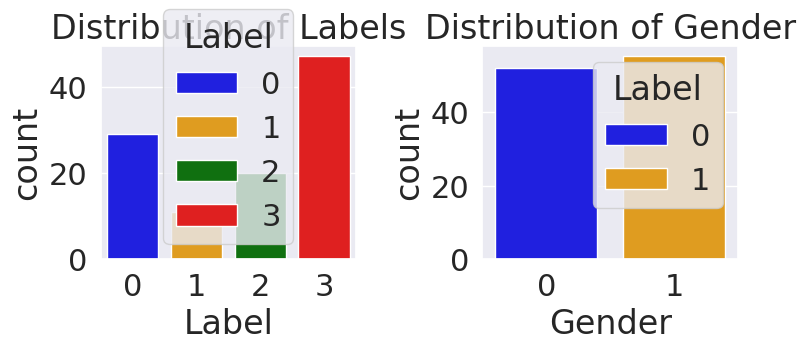

In [160]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
custom_palette1 = {'0': 'blue', '1': 'orange'}
custom_palette = {'0': 'blue', '1': 'orange', '2': 'green', '3': 'red'}
# Plot count plot for 'Label' in the first subplot
sns.countplot(x='Label', data=df, ax=axes[0],palette=custom_palette,legend=True)
axes[0].set_title('Distribution of Labels')
axes[0].legend(title='Label', labels=['0', '1','2','3'])
# Plot count plot for 'Gender' in the second subplot
sns.countplot(x='Gender', data=df, ax=axes[1],palette=custom_palette1)
axes[1].set_title('Distribution of Gender')
axes[1].legend(title='Label', labels=['0', '1'])

# Adjust layout
plt.tight_layout()

plt.show()


In [161]:
df.head(10)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175.0,80,25.3,0
1,2,30,0,160.0,60,22.5,0
2,3,35,1,180.0,90,27.3,2
3,4,40,0,150.0,50,20.0,3
4,5,45,1,190.0,100,31.2,1
5,6,50,0,140.0,40,16.7,3
6,7,55,1,200.0,110,34.2,1
7,8,60,0,130.0,30,13.3,3
8,9,65,1,210.0,120,37.2,1
9,10,70,0,120.0,20,10.0,3


In [162]:
obesity_cleanDf = df.drop(columns=['ID'])

## duplicates value handel

In [163]:
duplicates = obesity_cleanDf[obesity_cleanDf.duplicated(keep='first')]
duplicates

,Age,Gender,Height,Weight,BMI,Label


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Gender'),
  Text(0, 2.5, 'Height'),
  Text(0, 3.5, 'Weight'),
  Text(0, 4.5, 'BMI'),
  Text(0, 5.5, 'Label')])

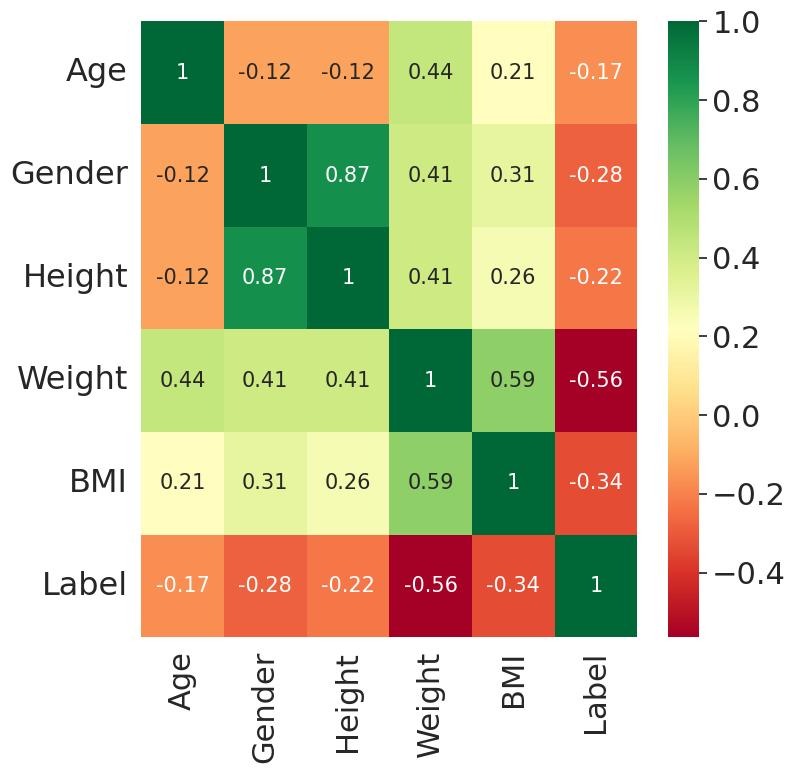

In [164]:

sns.set(font_scale=2)
plt.subplots(figsize=(8,8))

sns.heatmap(obesity_cleanDf.corr(method='pearson'), annot=True, cmap='RdYlGn', annot_kws={'size':15})

plt.yticks(fontsize=25)
plt.yticks(fontsize=23)

In [165]:
from sklearn.utils import shuffle
shuffled_df = shuffle(obesity_cleanDf)

shuffled_df

,Age,Gender,Height,Weight,BMI,Label
90,48,0,130.0,40,16.7,3
54,97,1,200.0,95,27.0,2
9,70,0,120.0,20,10.0,3
44,47,1,200.0,95,27.0,2
82,34,1,190.0,55,21.2,0
...,...,...,...,...,...,...
49,72,0,160.0,45,18.7,3
38,17,1,175.0,65,22.7,0
104,16,0,160.0,10,3.9,3
17,53,0,130.0,40,16.7,3


In [166]:
rearranged_df = shuffled_df.reset_index(drop=True)
rearranged_df

,Age,Gender,Height,Weight,BMI,Label
0,48,0,130.0,40,16.7,3
1,97,1,200.0,95,27.0,2
2,70,0,120.0,20,10.0,3
3,47,1,200.0,95,27.0,2
4,34,1,190.0,55,21.2,0
...,...,...,...,...,...,...
102,72,0,160.0,45,18.7,3
103,17,1,175.0,65,22.7,0
104,16,0,160.0,10,3.9,3
105,53,0,130.0,40,16.7,3


In [167]:
x = rearranged_df.drop(columns=['Label'])

In [168]:
y = rearranged_df['Label']

In [169]:
x.shape , y.shape

((107, 5), (107,))

In [170]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [171]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [172]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
scaled_X_train = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
scaled_X_test = scaler.transform(x_test)


In [173]:
# scaler = MinMaxScaler()
# # Fit and transform the training data
# scaled_X_train = scaler.fit_transform(x_train)

# # Transform the test data using the same scaler
# scaled_X_test = scaler.transform(x_test)

In [174]:
#Hyperparamter tuning using Gridsearch
from sklearn.svm import SVC


## <font color='blue'> SVM

In [175]:
model_svc = SVC()
model_svc.fit(scaled_X_train,y_train)

SVC()

In [176]:
# model_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [177]:
pred_svc = model_svc.predict(scaled_X_test)
accuracy_score(y_test,pred_svc)

0.7272727272727273

In [178]:
from sklearn.metrics import classification_report

In [179]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       1.00      0.67      0.80         3
           2       0.60      0.50      0.55         6
           3       0.88      1.00      0.93         7

    accuracy                           0.73        22
   macro avg       0.76      0.71      0.72        22
weighted avg       0.73      0.73      0.72        22



- tol
 - control when the algorithm stops and thus can have a significant impact
- param_grid
 - such as we select best paramter for svm as our goal is to rise perfomance of model


In [180]:
#Hyperparamter tuning using Gridsearch

# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'scale', 'auto'],
#               'kernel': ['linear','rbf','rbf', 'poly', 'sigmoid']}

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 'scale', 'auto'],
    'kernel': [ 'linear' ,'rbf',  'sigmoid'],
    'shrinking': [True, False],
    'probability': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'class_weight': [None, 'balanced']
}


In [181]:
# from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model_svc, param_grid=param_grid, cv=5)
grid_search.fit(scaled_X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'class_weight': [None, 'balanced'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 'scale',
                                   'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'shrinking': [True, False],
                         'tol': [0.001, 0.0001, 1e-05]})

In [182]:
# grid_search.get_params()

In [183]:
print(grid_search.best_estimator_)

SVC(C=100, gamma=1, kernel='linear', probability=True)


In [184]:
grid_svc = grid_search.predict(scaled_X_test)
accuracy_score(y_test,grid_svc)

0.9545454545454546

In [185]:
print(classification_report(y_test,grid_svc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         3
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         7

    accuracy                           0.95        22
   macro avg       0.96      0.96      0.96        22
weighted avg       0.96      0.95      0.95        22



In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [187]:
model_DT = DecisionTreeClassifier()

In [188]:
model_DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [189]:
dt_param_grid = {
    'ccp_alpha': [0.0],  # You can add more values to this list if you want to tune this parameter
    'criterion': ['gini', 'entropy','log_loss'],  # Usually these are the two options for criterion
    'max_depth': list(range(8,150,10)),  # This is similar to what you had in your Random Forest parameter grid
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': [None, 'sqrt', 'log2', 0.5, 10],
    'min_samples_leaf': [2,6,8],  # This is similar to what you had in your Random Forest parameter grid
    'min_samples_split': [2,6,8],  # This is similar to what you had in your Random Forest parameter grid
    'min_weight_fraction_leaf': [0.0],  # Same here
    'splitter': ['best', 'random']  # Usually these are the two options for splitter
}


In [190]:
from sklearn.model_selection import GridSearchCV

# Assuming 'model_DT' is your Decision Tree model
m_r = GridSearchCV(estimator=model_DT, param_grid=dt_param_grid, scoring='accuracy', cv=4)


In [191]:
%time m_r.fit(scaled_X_train,y_train)

CPU times: user 3min 2s, sys: 397 ms, total: 3min 3s
Wall time: 3min 4s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [8, 18, 28, 38, 48, 58, 68, 78, 88, 98,
                                       108, 118, 128, 138, 148],
                         'max_features': [None, 'sqrt', 'log2', 0.5, 10],
                         'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4,
                                                   0.5],
                         'min_samples_leaf': [2, 6, 8],
                         'min_samples_split': [2, 6, 8],
                         'min_weight_fraction_leaf': [0.0],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [192]:
m_r.best_params_,m_r.best_index_

({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 98,
  'max_features': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'splitter': 'random'},
 4861)

In [193]:
for param , score in zip(m_r.cv_results_['params'],m_r.cv_results_['mean_test_score']):
  print(param,score)

Streaming output truncated to the last 5000 lines.
{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 18, 'max_features': None, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 8, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'} 0.5968614718614719
{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 18, 'max_features': None, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 8, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'} 0.729978354978355
{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 18, 'max_features': None, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 8, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'} 0.6206709956709956
{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'} 0.8950216450216449
{'ccp_alpha': 0.0, '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'ccp_alpha': 0.0, 'criterion': 'log_loss', 'max_depth': 148, 'max_features': None, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 6, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'} 0.9415584415584415
{'ccp_alpha': 0.0, 'criterion': 'log_loss', 'max_depth': 148, 'max_features': None, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 6, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'} 0.8225108225108225
{'ccp_alpha': 0.0, 'criterion': 'log_loss', 'max_depth': 148, 'max_features': None, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 8, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'} 0.9069264069264068
{'ccp_alpha': 0.0, 'criterion': 'log_loss', 'max_depth': 148, 'max_features': None, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 8, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'} 0.7056277056277056
{'ccp_alpha': 0.0, 'criterion': 'log_loss', 'max_depth': 148, 'm

In [194]:
dt_bp = m_r.best_params_


In [195]:
dt_bp

{'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 98,
 'max_features': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'random'}

In [198]:

dt_classifier = DecisionTreeClassifier(ccp_alpha=dt_bp["ccp_alpha"],
                                       criterion=dt_bp["criterion"],
                                       max_depth=dt_bp["max_depth"],
                                       min_impurity_decrease=dt_bp["min_impurity_decrease"],
                                       max_features=dt_bp["max_features"],
                                       min_samples_leaf=dt_bp["min_samples_leaf"],
                                       min_samples_split=dt_bp["min_samples_split"],
                                       min_weight_fraction_leaf=dt_bp["min_weight_fraction_leaf"],
                                       splitter=dt_bp["splitter"])


In [199]:
dt_classifier.fit(scaled_X_train,y_train)

DecisionTreeClassifier(max_depth=98, min_samples_leaf=2, splitter='random')

In [200]:
y_pred_randomCV = dt_classifier.predict(scaled_X_test)

In [201]:
y_pred_randomCV

array([2, 3, 1, 0, 2, 3, 3, 2, 0, 1, 1, 1, 3, 2, 2, 0, 0, 0, 0, 3, 3, 3])

In [202]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score



print(confusion_matrix(y_test,y_pred_randomCV))
print(accuracy_score(y_test,y_pred_randomCV))
print(classification_report(y_test,y_pred_randomCV))
acc = accuracy_score(y_test,y_pred_randomCV)

[[6 0 0 0]
 [0 3 0 0]
 [0 1 5 0]
 [0 0 0 7]]
0.9545454545454546
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.75      1.00      0.86         3
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         7

    accuracy                           0.95        22
   macro avg       0.94      0.96      0.94        22
weighted avg       0.97      0.95      0.96        22

